<a href="https://colab.research.google.com/github/HadiRizwan47/Begineer-machine-learning-project/blob/main/ML_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fd = pd.read_csv('/content/medical_insurance.csv')

In [ ]:
fd.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
fd.shape

(2772, 7)

In [ ]:
fd.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
fd.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


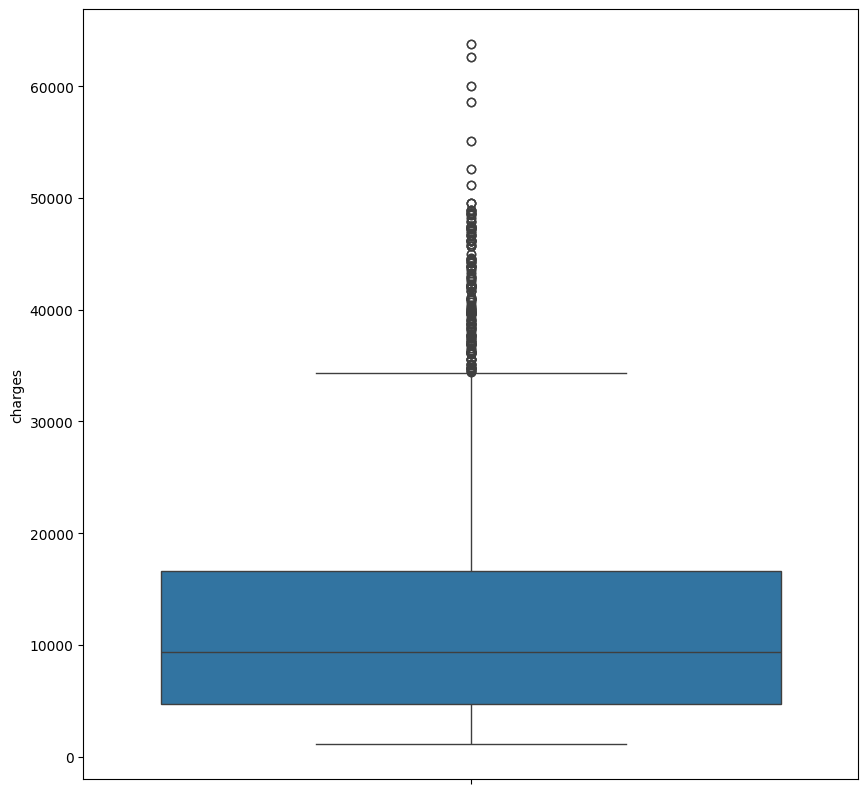

In [ ]:
plt.figure(figsize = (10,10))
sns.boxplot(fd['charges'])
plt.show(block = True)

<Axes: ylabel='age'>

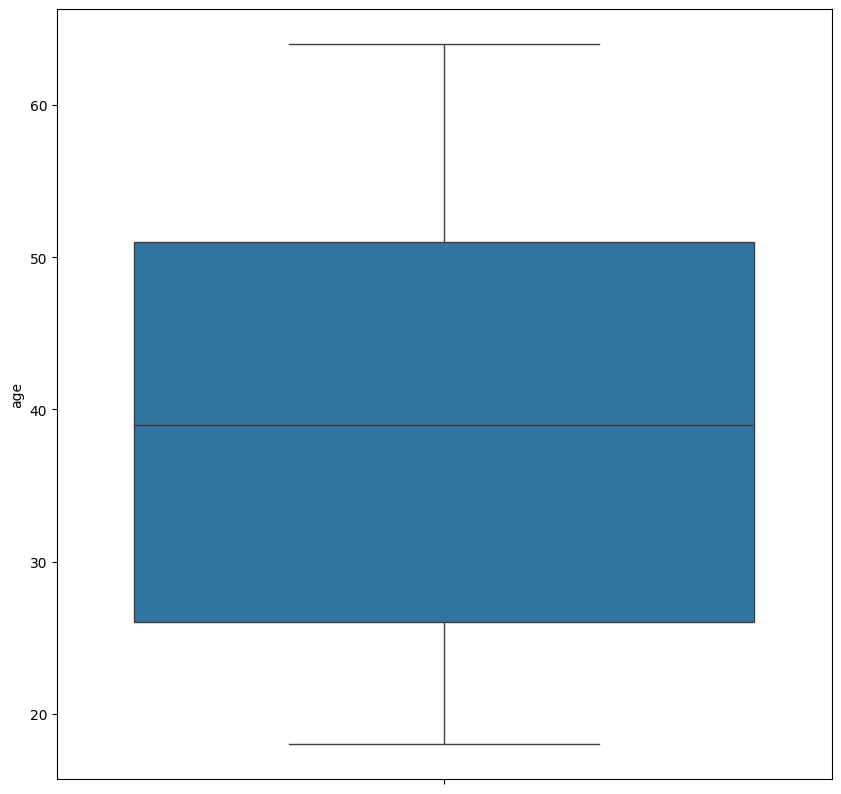

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(fd['age'])

<Axes: ylabel='bmi'>

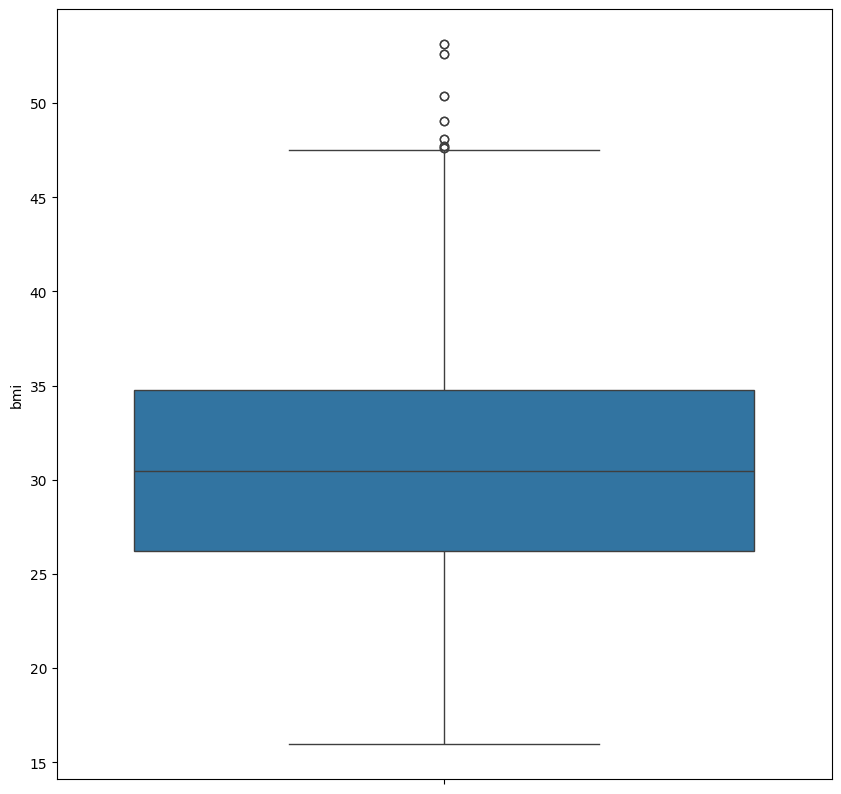

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(fd['bmi'])

In [ ]:
num_categories = fd['region'].nunique()
print("number of categories", num_categories)

number of categories 4


In [ ]:
fd['age'].nunique()

47

In [ ]:
region_mapping = {'southwest':1,'southeast':2,'northwest':3,'northeast':4}
fd['region'] = fd['region'].map(region_mapping)

In [ ]:
fd.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,1,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,3,21984.47061
4,32,male,28.880,0,no,3,3866.85520
5,31,female,25.740,0,no,2,3756.62160
6,46,female,33.440,1,no,2,8240.58960
7,37,female,27.740,3,no,3,7281.50560
8,37,male,29.830,2,no,4,6406.41070
9,60,female,25.840,0,no,3,28923.13692


In [ ]:
region_mapping2 = {'yes':0, 'no':1}
fd['smoker'] = fd['smoker'].map(region_mapping2)

In [ ]:
fd.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,0,1,16884.92400
1,18,male,33.770,1,1,2,1725.55230
2,28,male,33.000,3,1,2,4449.46200
3,33,male,22.705,0,1,3,21984.47061
4,32,male,28.880,0,1,3,3866.85520


In [ ]:
region_mapping3 = {'female':0, 'male':1}
fd['sex'] = fd['sex'].map(region_mapping3)

In [ ]:
fd.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520


<Axes: >

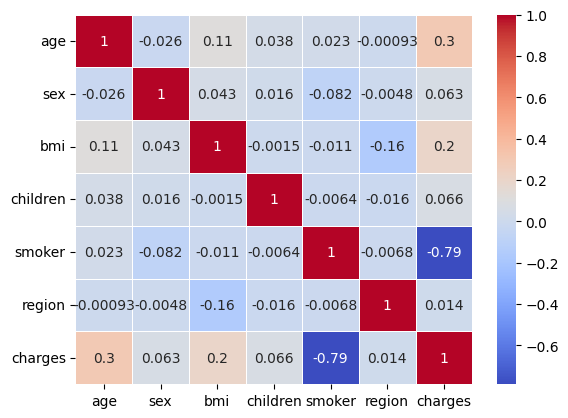

In [ ]:
corr = fd.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidths = 0.5)

In [ ]:
fd.drop('children', axis = 1, inplace = True)

In [ ]:
lower_limit = fd['charges'].quantile(0.05)
upper_limit = fd['charges'].quantile(0.95)
print(f'Lower Limit: {lower_limit}, Upper Limit: {upper_limit}')

Lower Limit: 1744.465, Upper Limit: 41661.602


In [ ]:
fd['charges'] = fd['charges'].clip(lower=lower_limit, upper=upper_limit)

<Axes: ylabel='charges'>

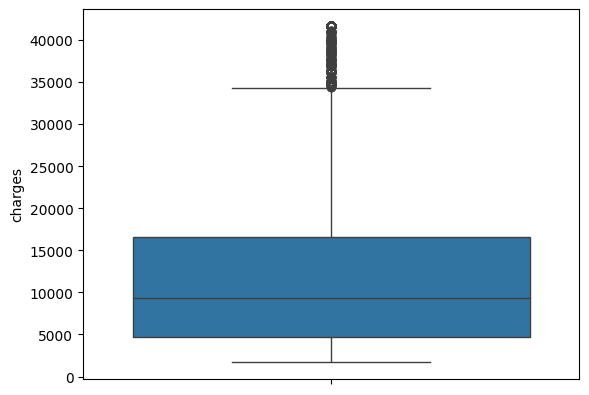

In [ ]:
sns.boxplot(fd['charges'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
fd['bmi_age'] = fd['bmi'] * fd['age']
fd['smoker_age'] = fd['bmi'] * (fd['age'] == 'yes').astype(int)

In [ ]:
x = fd.drop('charges', axis=1)
y = fd['charges']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.35, random_state = 42)

In [ ]:
x_train

,age,sex,bmi,smoker,region,bmi_age,smoker_age
1532,46,1,30.495,0,3,1402.77,0.0
2111,30,0,39.050,0,2,1171.50,0.0
297,47,1,25.410,0,2,1194.27,0.0
598,43,1,32.600,1,1,1401.80,0.0
1815,27,0,30.400,1,3,820.80,0.0
...,...,...,...,...,...,...,...
1638,54,1,34.210,0,2,1847.34,0.0
1095,18,0,31.350,1,4,564.30,0.0
1130,39,0,23.870,1,2,930.93,0.0
1294,58,1,25.175,1,4,1460.15,0.0


In [ ]:
x_test

,age,sex,bmi,smoker,region,bmi_age,smoker_age
1106,49,0,29.925,1,3,1466.325,0.0
1321,62,1,26.695,0,4,1655.090,0.0
2313,57,0,20.100,1,1,1145.700,0.0
2274,22,1,39.500,1,1,869.000,0.0
1432,18,0,38.665,1,4,695.970,0.0
...,...,...,...,...,...,...,...
836,36,1,31.500,1,1,1134.000,0.0
1330,57,0,25.740,1,2,1467.180,0.0
374,20,1,33.330,1,2,666.600,0.0
1659,50,1,27.455,1,4,1372.750,0.0


In [ ]:
y_train

,charges
1532,40720.55105
2111,40932.42950
297,21978.67690
598,7441.50100
1815,18804.75240
...,...
1638,41661.60200
1095,4561.18850
1130,8582.30230
1294,11931.12525


In [ ]:
y_test

,charges
1106,8988.15875
1321,28101.33305
2313,12032.32600
2274,1744.46500
1432,3393.35635
...,...
836,4402.23300
1330,12629.16560
374,1744.46500
1659,9617.66245


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
print(y_pred)

[ 1.07940167e+04  3.60638338e+04  9.64565210e+03  6.55237664e+03
  6.37186661e+03  3.20159035e+04  5.85707528e+03  3.67770718e+04
  1.12646397e+04  3.64365501e+03  1.06452024e+04  1.33187065e+04
  6.21166599e+03  1.15585566e+04  4.24040971e+03  6.28084527e+03
  9.84951074e+03  9.53717967e+03  5.44455735e+03  3.63046340e+03
  1.20366611e+04  3.16640707e+04  2.97303491e+04  3.79024279e+04
  2.68009218e+04  9.81647157e+03 -6.36205393e+02  1.63645677e+04
  8.76207260e+03  6.36667558e+02  1.39275656e+04  4.03209509e+03
  3.63931882e+03  2.87473661e+03  1.45318045e+04  1.23022389e+04
  2.83707514e+03  3.02076739e+03  8.62484942e+03  3.04282935e+04
  6.28065985e+03  9.64314820e+03  1.28972279e+04  6.01573713e+03
  9.96988345e+02  3.86417647e+04  4.77163535e+03  3.43820575e+04
  5.41156708e+03  6.57108371e+03  3.41504022e+04  8.93136517e+03
  3.55174107e+03  9.79137200e+03  5.79666266e+03  1.19973163e+04
  3.62058703e+03  1.99726966e+03  6.02435354e+03  7.52402310e+03
  8.80443202e+03  3.93097

In [ ]:
results = np.column_stack((y_test, y_pred))
print('Actual VS Predicted')
for actual, predicted in results:
  print(f"{actual:14.2f} {predicted:12.2f}")

Actual VS Predicted
       8988.16     10794.02
      28101.33     36063.83
      12032.33      9645.65
       1744.46      6552.38
       3393.36      6371.87
      24106.91     32015.90
       4746.34      5857.08
      41661.60     36777.07
       8556.91     11264.64
       2639.04      3643.66
      11552.90     10645.20
      10594.23     13318.71
       2498.41      6211.67
      20878.78     11558.56
       4340.44      4240.41
       6799.46      6280.85
      30284.64      9849.51
       9861.02      9537.18
       3761.29      5444.56
      24059.68      3630.46
      10370.91     12036.66
      41661.60     31664.07
      19594.81     29730.35
      41661.60     37902.43
      33907.55     26800.92
       8547.69      9816.47
       1744.46      -636.21
      14210.54     16364.57
      24603.05      8762.07
       1744.46       636.67
      10579.71     13927.57
       4718.20      4032.10
       1744.46      3639.32
       1744.46      2874.74
      28287.90     14531.80


In [ ]:
residual = actual- y_pred.reshape(-1)
print(residual)

[-2.76604873e+03 -2.80358658e+04 -1.61768410e+03  1.47559136e+03
  1.65610139e+03 -2.39879355e+04  2.17089272e+03 -2.87491038e+04
 -3.23667167e+03  4.38431299e+03 -2.61723443e+03 -5.29073854e+03
  1.81630201e+03 -3.53058861e+03  3.78755829e+03  1.74712273e+03
 -1.82154274e+03 -1.50921167e+03  2.58341065e+03  4.39750460e+03
 -4.00869310e+03 -2.36361027e+04 -2.17023811e+04 -2.98744599e+04
 -1.87729538e+04 -1.78850357e+03  8.66417339e+03 -8.33659970e+03
 -7.34104603e+02  7.39130044e+03 -5.89959765e+03  3.99587291e+03
  4.38864918e+03  5.15323139e+03 -6.50383652e+03 -4.27427089e+03
  5.19089286e+03  5.00720061e+03 -5.96881425e+02 -2.24003255e+04
  1.74730815e+03 -1.61518020e+03 -4.86925987e+03  2.01223087e+03
  7.03097965e+03 -3.06137967e+04  3.25633265e+03 -2.63540895e+04
  2.61640092e+03  1.45688429e+03 -2.61224342e+04 -9.03397171e+02
  4.47622693e+03 -1.76340400e+03  2.23130534e+03 -3.96934828e+03
  4.40738097e+03  6.03069834e+03  2.00361446e+03  5.03944899e+02
 -7.76464023e+02  4.09699

<Axes: ylabel='Density'>

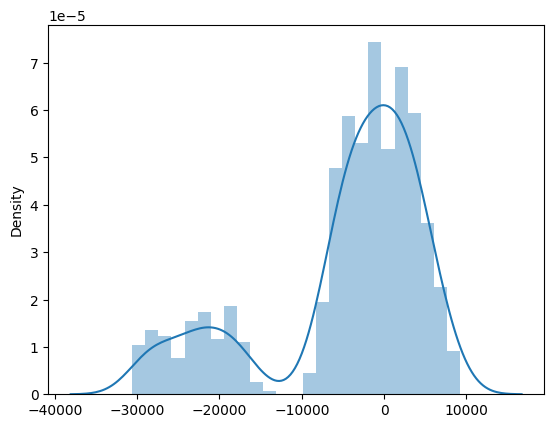

In [ ]:
sns.distplot(residual, kde=True )

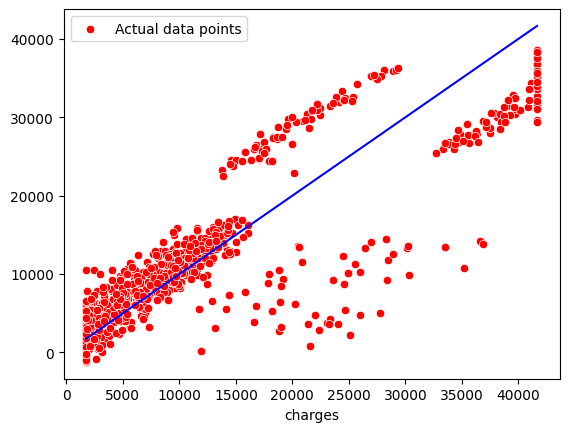

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Actual data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue',label= 'Ideal line' )

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE:',mse)
print('RMSE:',rmse)

MSE: 32426085.03703282
RMSE: 5694.390664244316


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train, y_train)
y_pred_rf = rf_regressor.predict(x_test)
Dtr = mean_squared_error(y_pred_rf, y_test)
print(Dtr)

16411050.691281654


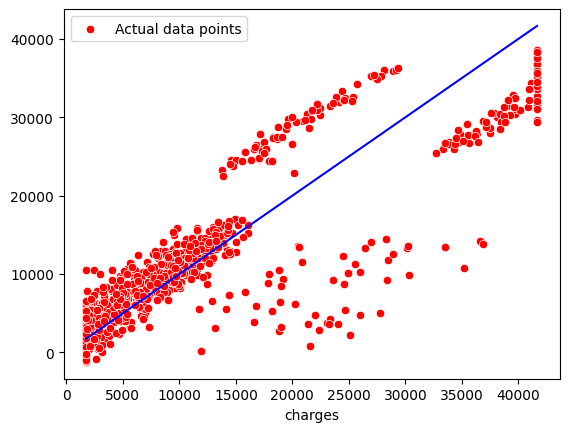

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Actual data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue',label= 'Ideal line' )

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(x_train, y_train)
y_pred_rf = rf_regressor.predict(x_test)
GBr = mean_squared_error(y_pred_rf,y_test)
print('GBr:-',GBr)

GBr:- 16759751.66544493


In [ ]:
rf_regressor.fit(x_train,y_train)
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
rmse =  np.sqrt(mse)
print('RFr:-',RFr)
print('RMSE:-',rmse)

RFr:- 16759751.665444927
RMSE:- 5694.390664244316
